# Stellar Classification Dataset - SDSS17
In astronomy, stellar classification is the classification of stars based on their spectral characteristics. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

## Libraries

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics, tree
from imblearn.over_sampling import RandomOverSampler
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Dataset


In [6]:
df = pd.read_csv('star_classification.csv') 
df.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.


- **obj_ID** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- **alpha** = Right Ascension angle (at J2000 epoch)
- **delta** = Declination angle (at J2000 epoch)
- **u** = Ultraviolet filter in the photometric system
- **g** = Green filter in the photometric system
- **r** = Red filter in the photometric system
- **i** = Near Infrared filter in the photometric system
- **z** = Infrared filter in the photometric system
- **run_ID** = Run Number used to identify the specific scan
- **rereun_ID** = Rerun Number to specify how the image was processed
- **cam_col** = Camera column to identify the scanline within the run
- **field_ID** = Field number to identify each field
- **spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- **class** = object class (galaxy, star or quasar object)
- **redshift** = redshift value based on the increase in wavelength
- **plate** = plate ID, identifies each plate in SDSS
- **MJD** = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- **fiber_ID** = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


In [7]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Almost every column type is int or float, only 'class' is string.

In [9]:
df['class'].head(5)

0    GALAXY
1    GALAXY
2    GALAXY
3    GALAXY
4    GALAXY
Name: class, dtype: object

As we can see first 5 records are GALAXY type. We need to determine the percentage of each category to determine if the scale is insignificant or if we need to remove excess data (under-sampling) or add data to less frequent classes (over-sampling) in order to balance the dataset.

In [10]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

It is apparent that there are a large number of records of GALAXY type and a small number of records of STAR and QSO types.

In [11]:
df['class'] = df['class'].replace(['GALAXY', 'STAR','QSO'], [0, 1, 2])


We are converting the categorical variables to numerical variables: 'GALAXY' to 0, 'STAR' to 1, and 'QSO' to 2.

In [12]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df['class'] = pd.DataFrame(df['class'])
df['class'].value_counts()

0    59445
1    21594
2    18961
Name: class, dtype: int64

We need to check if our dataset contains any missing data, and if so, we must remove them or fill in the missing values with the median value of that column.

In [13]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

We do not have any missing data.

In [14]:
ros = RandomOverSampler(random_state=42)
df, df['class'] = ros.fit_resample(df, df['class'])

This code uses the RandomOverSampler class from the imblearn library to perform over-sampling on the dataset in order to address class imbalance. 

In [15]:
df['class'].value_counts()

0    59445
2    59445
1    59445
Name: class, dtype: int64

## Preprocessing

We can split our dataset into two versions - one with less preprocessing and another with more preprocessing - to see if there is an improvement in our accuracy.

In [16]:
less_processed_data = df.copy()
more_processed_data = df.copy()

In [17]:
columns_to_scale = ['alpha','delta','r','i','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID', ]

The list columns_to_scale contains the names of the columns in the more_processed_data dataframe that need to be scaled.

In [18]:
scaler = StandardScaler()

An instance of the StandardScaler class is created, which will be used to scale the specified columns.

In [19]:
more_processed_data[columns_to_scale] = scaler.fit_transform(more_processed_data[columns_to_scale])
more_processed_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,-0.429491,0.398092,23.87882,22.27530,0.368912,-0.063240,18.79371,3606,301,2,-0.714164,0.149225,0,-0.085463,0.149248,0.348182,-1.022905
1,1.237665e+18,-0.336012,0.336549,24.77759,22.83188,1.567727,1.063630,21.61427,4518,301,5,-0.439059,1.691902,0,0.072667,1.691913,1.348966,-0.085713
2,1.237661e+18,-0.362994,0.553799,25.26307,22.66389,0.486498,0.039656,18.94827,3606,301,2,-0.432181,-0.262317,0,-0.075164,-0.262306,-0.074543,-0.554309
3,1.237663e+18,1.647903,-1.260805,22.13682,23.77656,1.035063,0.690192,19.25010,4192,301,3,0.214315,1.260399,0,0.240512,1.260380,1.282949,1.188282
4,1.237680e+18,1.714829,-0.172268,19.43718,17.58028,-1.765173,-1.857675,15.54461,8102,301,3,-0.315262,0.252168,0,-0.653680,0.252137,0.255538,1.433563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178330,1.237659e+18,0.304890,1.399777,18.96784,18.73330,-0.595684,-0.530366,18.35832,3180,301,2,-0.975513,-1.438713,2,1.059817,-1.438700,-1.809271,-0.920399
178331,1.237659e+18,0.350101,1.351032,22.19430,22.12304,1.239736,1.465774,21.95071,3180,301,2,-0.844838,1.012646,2,0.719848,1.012648,1.169779,0.177872
178332,1.237662e+18,-0.055407,0.834024,20.17643,22.18661,0.756400,0.278081,19.56072,3840,301,2,-0.494080,-0.237288,2,6.385826,-0.237333,0.156236,1.971716
178333,1.237660e+18,-1.336162,-1.259706,20.18306,20.05315,0.041966,0.270292,19.53668,3438,301,3,-0.473447,-1.549591,2,0.434164,-1.549581,-1.954617,-0.825216


In [20]:
more_processed_data = more_processed_data.drop( ['u','g','z', 'run_ID','rerun_ID', 'cam_col'],axis=1)


The specified columns of the more_processed_data dataframe are scaled using the fit_transform() method of the StandardScaler instance. This method fits the scaler on the specified columns and then transforms the columns to have zero mean and unit variance. The transformed columns are then assigned back to the more_processed_data dataframe.

In [21]:
target_column = ['class']

predictors = list(set(list(df.columns))-set(target_column)-set(['obj_ID']))
predictors_MP= list(set(list(more_processed_data.columns))-set(target_column)-set(['obj_ID']))

**predictors** is a list of column names that will be used as input to a machine learning algorithm to make predictions. It is created by taking a set of all column names in the dataframe (df.columns), subtracting the target_column and the column name 'obj_ID', and converting the resulting set back to a list.

In [22]:
labels = ['Galaxy', 'Star', 'Quasar']

The variable labels is a list that contains the names of the different classes (GALAXY, STAR or QUASAR) in a classification problem.

In [23]:
(LP_train_values, LP_test_values, LP_train_label, LP_test_label) = train_test_split(less_processed_data[predictors], less_processed_data[target_column].values, test_size=0.30, random_state=3)
(MP_train_values, MP_test_values, MP_train_label, MP_test_label) = train_test_split(more_processed_data[predictors_MP], more_processed_data[target_column].values, test_size=0.30, random_state=3)


This code is used to split two different dataframes, less_processed_data and more_processed_data, into training and testing sets for use in machine learning algorithms. 
- **predictors** is a list of column names that contains the features (or inputs) that will be used to train the machine learning models.
- **target_column** is a list that contains the name of the target column (or output) that the machine learning models will try to predict.
- **test_size** is set to 0.3, which means that 30% of the data will be used for testing and 70% for training.
- **random_state** is set to 3, which ensures that the same split is generated each time the code is run.

## Decision Tree Classifier

In [24]:
LP_DT_smaller = tree.DecisionTreeClassifier(max_depth=4)
LP_DT_bigger = tree.DecisionTreeClassifier()

MP_DT_smaller = tree.DecisionTreeClassifier(max_depth=4)
MP_DT_bigger = tree.DecisionTreeClassifier()

### Decision Tree Classifier for less processed data:

In [25]:
LP_DT_smaller.fit(LP_train_values, LP_train_label)
LP_DT_bigger.fit(LP_train_values, LP_train_label)

LP_smaller_acc = LP_DT_smaller.predict(LP_test_values)
LP_bigger_acc = LP_DT_bigger.predict(LP_test_values)

print("accuracy of smaller tree and less processed: ", LP_DT_smaller.score(LP_test_values, LP_test_label))
print("accuracy of bigger tree and less processed: ", LP_DT_bigger.score(LP_test_values, LP_test_label))

LP_smaller_matrix = confusion_matrix(LP_test_label, LP_smaller_acc)

LP_bigger_matrix = confusion_matrix(LP_test_label, LP_bigger_acc)


accuracy of smaller tree and less processed:  0.9484308704510196
accuracy of bigger tree and less processed:  0.984953552270051


[Text(0.3958333333333333, 0.9, 'x[10] <= 0.004\ngini = 0.667\nsamples = 124834\nvalue = [41634, 41534, 41666]'),
 Text(0.125, 0.7, 'x[10] <= -0.005\ngini = 0.017\nsamples = 41899\nvalue = [358, 41534, 7]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.16666666666666666, 0.5, 'x[10] <= -0.0\ngini = 0.017\nsamples = 41894\nvalue = [353, 41534, 7]'),
 Text(0.08333333333333333, 0.3, 'x[4] <= 27.338\ngini = 0.002\nsamples = 26428\nvalue = [25, 26403, 0]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.002\nsamples = 26423\nvalue = [24, 26399, 0]'),
 Text(0.125, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(0.25, 0.3, 'x[10] <= 0.0\ngini = 0.042\nsamples = 15466\nvalue = [328, 15131, 7]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.383\nsamples = 384\nvalue = [285, 99, 0]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.007\nsamples = 15082\nvalue = [43, 15032, 7]'),
 Text(0.6666666666666666, 0.7, 'x[10] <= 0.894\ngini = 0.5\nsamples = 82935\nval

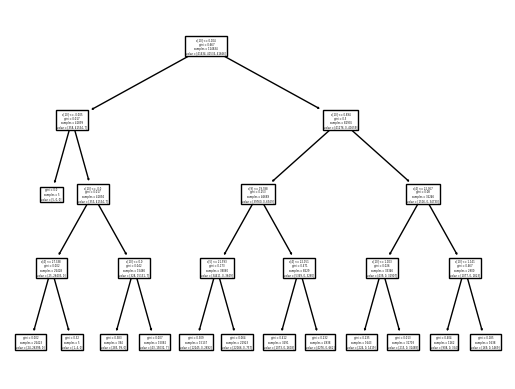

In [26]:
tree.plot_tree(LP_DT_smaller)

[Text(0.340709527893463, 0.9838709677419355, 'x[10] <= 0.004\ngini = 0.667\nsamples = 124834\nvalue = [41634, 41534, 41666]'),
 Text(0.02999597747385358, 0.9516129032258065, 'x[10] <= -0.005\ngini = 0.017\nsamples = 41899\nvalue = [358, 41534, 7]'),
 Text(0.029362274893248344, 0.9193548387096774, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.030629680054458815, 0.9193548387096774, 'x[10] <= -0.0\ngini = 0.017\nsamples = 41894\nvalue = [353, 41534, 7]'),
 Text(0.016538152113373353, 0.8870967741935484, 'x[4] <= 27.338\ngini = 0.002\nsamples = 26428\nvalue = [25, 26403, 0]'),
 Text(0.011342286032551519, 0.8548387096774194, 'x[10] <= -0.002\ngini = 0.002\nsamples = 26423\nvalue = [24, 26399, 0]'),
 Text(0.0028516616127235595, 0.8225806451612904, 'x[12] <= 16.164\ngini = 0.065\nsamples = 118\nvalue = [4, 114, 0]'),
 Text(0.0022179590321183243, 0.7903225806451613, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.003485364193328795, 0.7903225806451613, 'x[0] <= 11.728\ngini = 0

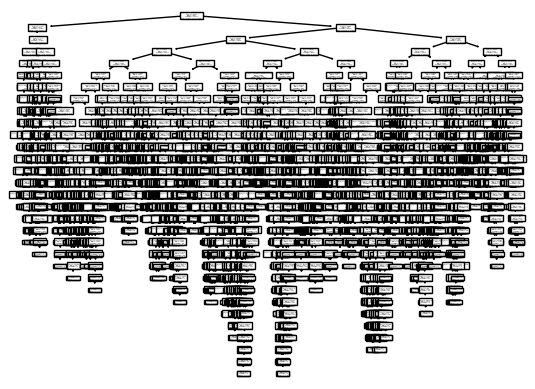

In [27]:
tree.plot_tree(LP_DT_bigger)

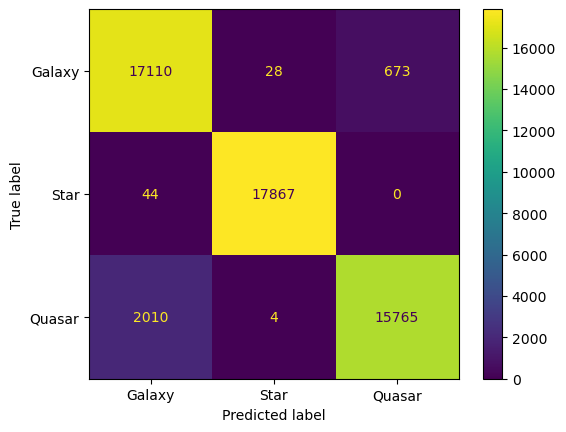

In [28]:
LPdisp = ConfusionMatrixDisplay(confusion_matrix=LP_smaller_matrix, display_labels=labels)
LPdisp.plot()

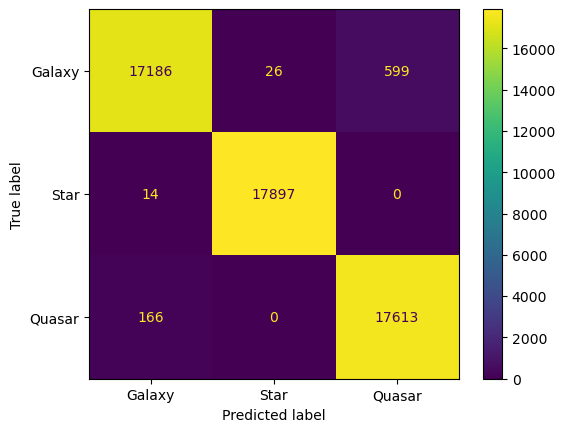

In [29]:
LPdisp = ConfusionMatrixDisplay(confusion_matrix=LP_bigger_matrix, display_labels=labels)
LPdisp.plot()

The resulting LPdisp object can be used to visualize the confusion matrix in various ways, such as using the plot() method to display a heatmap of the matrix with color-coded cells representing the number of true positives, false positives, true negatives, and false negatives for each class.

In the less processed and smaller decision tree, we achieved an accuracy of 94%, while in the less processed and bigger one we achieved 98%. The algorithm classified stars most accurately.

In [30]:
MP_DT_smaller.fit(MP_train_values, MP_train_label)
MP_DT_bigger.fit(MP_train_values, MP_train_label)

MP_smaller_acc = MP_DT_smaller.predict(MP_test_values)
MP_bigger_acc = MP_DT_bigger.predict(MP_test_values)

print("accuracy of smaller tree and more processed: ", MP_DT_smaller.score(MP_test_values, MP_test_label))
print("accuracy of bigger tree and more processed: ", MP_DT_bigger.score(MP_test_values, MP_test_label))

MP_smaller_matrix = confusion_matrix(MP_test_label, MP_smaller_acc)

MP_bigger_matrix = confusion_matrix(MP_test_label, MP_bigger_acc)


accuracy of smaller tree and more processed:  0.9440384291882394
accuracy of bigger tree and more processed:  0.9831031195678586


[Text(0.3958333333333333, 0.9, 'x[2] <= -0.776\ngini = 0.667\nsamples = 124834\nvalue = [41634, 41534, 41666]'),
 Text(0.125, 0.7, 'x[2] <= -0.786\ngini = 0.017\nsamples = 41899\nvalue = [358, 41534, 7]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.16666666666666666, 0.5, 'x[2] <= -0.781\ngini = 0.017\nsamples = 41894\nvalue = [353, 41534, 7]'),
 Text(0.08333333333333333, 0.3, 'x[2] <= -0.783\ngini = 0.002\nsamples = 26311\nvalue = [25, 26286, 0]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.057\nsamples = 169\nvalue = [5, 164, 0]'),
 Text(0.125, 0.1, 'gini = 0.002\nsamples = 26142\nvalue = [20, 26122, 0]'),
 Text(0.25, 0.3, 'x[2] <= -0.781\ngini = 0.042\nsamples = 15583\nvalue = [328, 15248, 7]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.496\nsamples = 623\nvalue = [285, 338, 0]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.007\nsamples = 14960\nvalue = [43, 14910, 7]'),
 Text(0.6666666666666666, 0.7, 'x[2] <= 0.198\ngini = 0.5\nsamples = 829

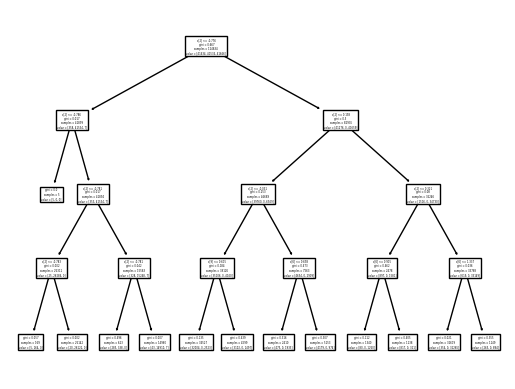

In [31]:
tree.plot_tree(MP_DT_smaller)

[Text(0.35883811893979356, 0.984375, 'x[2] <= -0.776\ngini = 0.667\nsamples = 124834\nvalue = [41634, 41534, 41666]'),
 Text(0.020485794613502858, 0.953125, 'x[2] <= -0.786\ngini = 0.017\nsamples = 41899\nvalue = [358, 41534, 7]'),
 Text(0.019987189150656757, 0.921875, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.020984400076348962, 0.921875, 'x[2] <= -0.781\ngini = 0.017\nsamples = 41894\nvalue = [353, 41534, 7]'),
 Text(0.009119026472833794, 0.890625, 'x[2] <= -0.783\ngini = 0.002\nsamples = 26311\nvalue = [25, 26286, 0]'),
 Text(0.0033655868742111907, 0.859375, 'x[2] <= -0.783\ngini = 0.057\nsamples = 169\nvalue = [5, 164, 0]'),
 Text(0.0028669814113650885, 0.828125, 'x[0] <= -1.698\ngini = 0.046\nsamples = 168\nvalue = [4, 164, 0]'),
 Text(0.0016204677542498325, 0.796875, 'x[5] <= -0.223\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.00112186229140373, 0.765625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.002119073217095935, 0.765625, 'gini = 0.0\nsampl

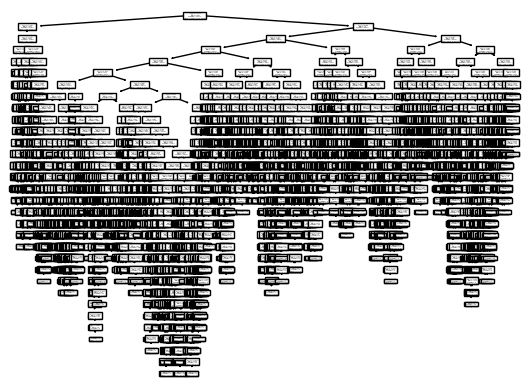

In [32]:
tree.plot_tree(MP_DT_bigger)

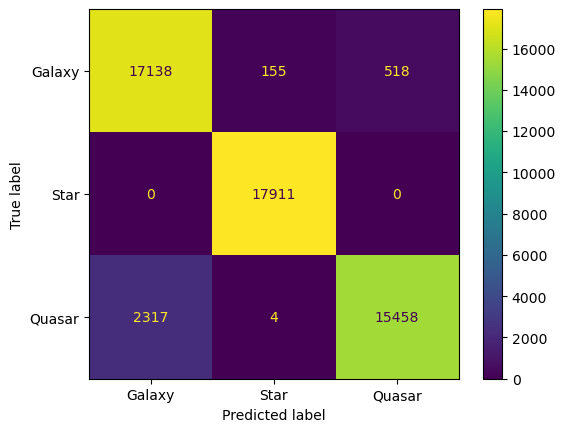

In [33]:
MPdisp = ConfusionMatrixDisplay(confusion_matrix=MP_smaller_matrix, display_labels=labels)
MPdisp.plot()

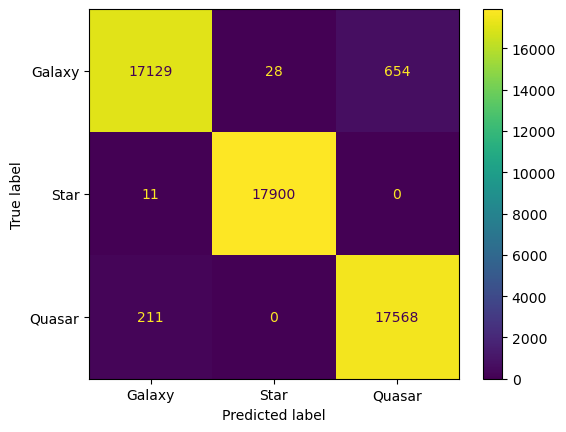

In [34]:
MPdisp = ConfusionMatrixDisplay(confusion_matrix=MP_bigger_matrix, display_labels=labels)
MPdisp.plot()

In the more processed and smaller decision tree, we achieved an accuracy of 94%, while in the more processed  and bigger one we achieved 98%. The algorithm classified stars most accurately.

## Naive-Bayes

### Naive-Bayes for less processed data

In [35]:
LP_gaussian = GaussianNB()
LP_gaussian_pred = LP_gaussian.fit(LP_train_values, LP_train_label).predict(LP_test_values)
LP_gaussian.score(LP_test_values, LP_test_label)


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4697482290050653

We can see that the accuracy of Naive-Bayes for the less processed data is 46%, which is much lower compared to the Decision Tree Classifier.

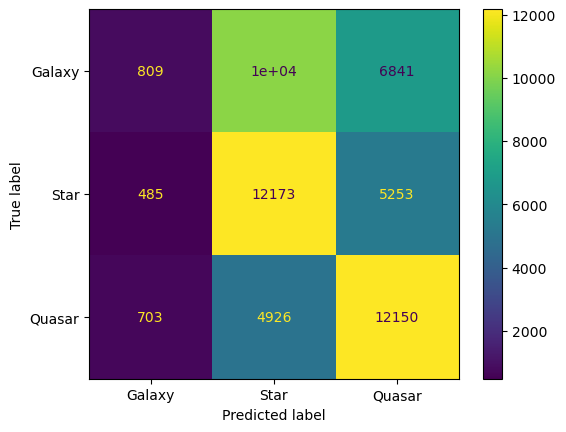

In [36]:
cm = confusion_matrix(LP_test_label, LP_gaussian_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

Naive-Bayes makes the most mistakes in classifying GALAXY. It performs the best in classifying STAR.

### Naive-Bayes for more processed data

In [37]:
MP_gaussian = GaussianNB()
MP_gaussian_pred = MP_gaussian.fit(MP_train_values, MP_train_label).predict(MP_test_values)
MP_gaussian.score(MP_test_values, MP_test_label)


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8779835890917926

The accuracy of Naive-Bayes for the more processed data is 87%.

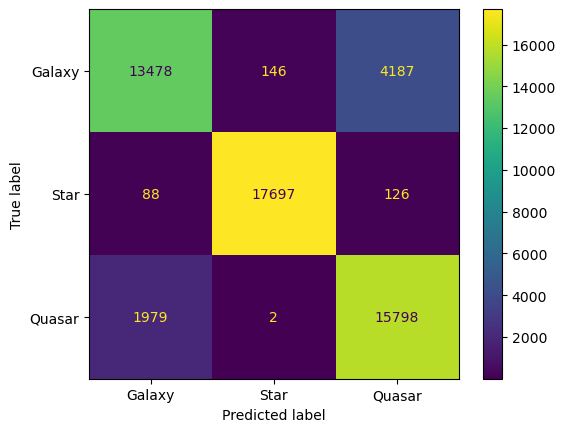

In [38]:
cm = confusion_matrix(MP_test_label, MP_gaussian_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

It performs the best classifying STAR.

## K-Nearest Neighbors

### K-Nearest Neighbors for less processed data and k=3

In [39]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
LPknn_pred = knn.fit(LP_train_values, LP_train_label).predict(LP_test_values)
knn.score(LP_test_values, LP_test_label)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7519111792302947

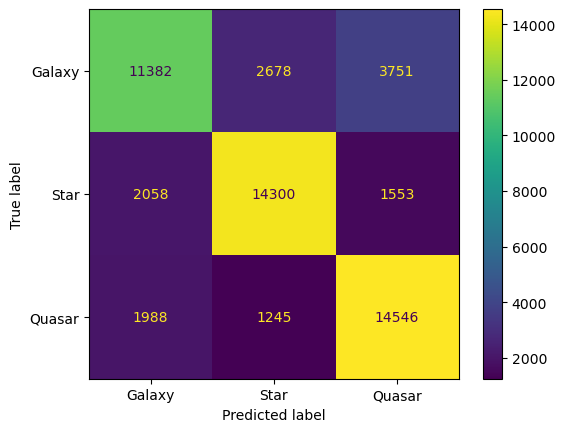

In [40]:
LP_knn_matrix = confusion_matrix(LP_test_label, LPknn_pred)
LP_matrix_display = ConfusionMatrixDisplay(confusion_matrix=LP_knn_matrix, display_labels=labels)
LP_matrix_display.plot()

The accuracy of KNN for the more processed data is 75% and it performs the worst classifying GALAXY.

### K-Nearest Neighbors for more processed data and k=3

In [42]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
MP_knn_pred = knn.fit(MP_train_values, MP_train_label).predict(MP_test_values)
knn.score(MP_test_values, MP_test_label)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9340386161006337

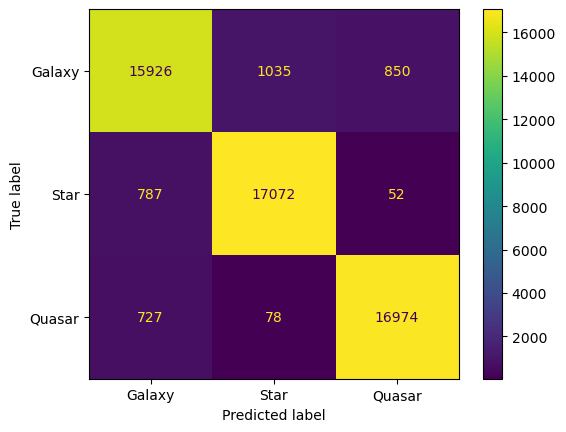

In [43]:
MP_knn_matrix = confusion_matrix(MP_test_label, MP_knn_pred)
MP_matrix_display = ConfusionMatrixDisplay(confusion_matrix=MP_knn_matrix, display_labels=labels)
MP_matrix_display.plot()

The accuracy of KNN for the more processed data is 93% and it performs the worst classifying GALAXY.

### K-Nearest Neighbors for less processed data and k=5

In [44]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
LPknn_pred = knn.fit(LP_train_values, LP_train_label).predict(LP_test_values)
knn.score(LP_test_values, LP_test_label)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6973888338535729

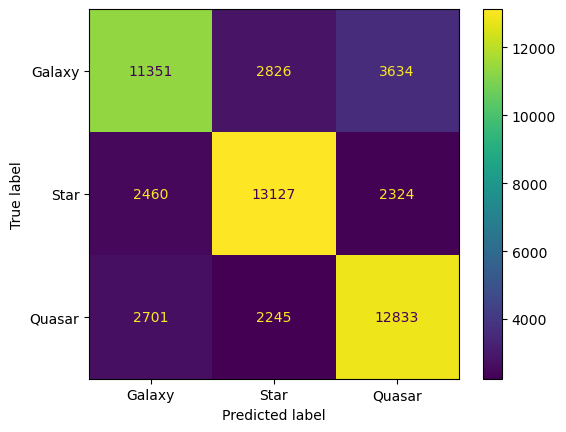

In [45]:
LP_knn_matrix = confusion_matrix(LP_test_label, LPknn_pred)
LP_matrix_display = ConfusionMatrixDisplay(confusion_matrix=LP_knn_matrix, display_labels=labels)
LP_matrix_display.plot()

The accuracy of KNN for the less processed data is 69% and it performs the worst classifying GALAXY.

### K-Nearest Neighbors for more processed data and k=5

In [46]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
MP_knn_pred = knn.fit(MP_train_values, MP_train_label).predict(MP_test_values)
knn.score(MP_test_values, MP_test_label)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9220762228743388

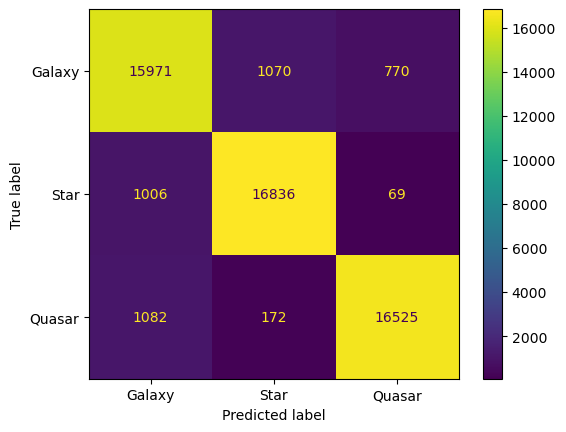

In [47]:
MP_knn_matrix = confusion_matrix(MP_test_label, MP_knn_pred)
MP_matrix_display = ConfusionMatrixDisplay(confusion_matrix=MP_knn_matrix, display_labels=labels)
MP_matrix_display.plot()

The accuracy of KNN for the more processed data is 92% and it performs the worst classifying GALAXY.

### K-Nearest Neighbors for less processed data and k=11

In [48]:
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
LPknn_pred = knn.fit(LP_train_values, LP_train_label).predict(LP_test_values)
knn.score(LP_test_values, LP_test_label)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6633147043980486

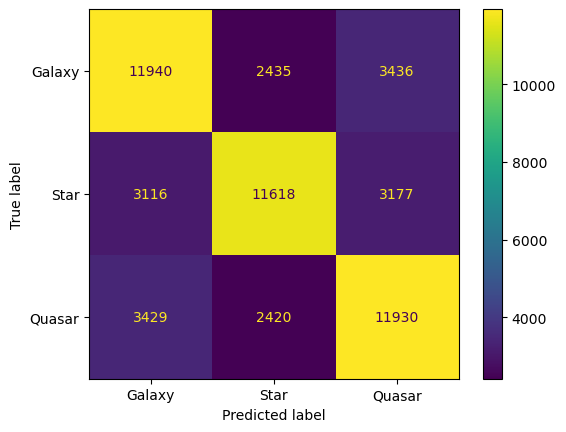

In [49]:
LP_knn_matrix = confusion_matrix(LP_test_label, LPknn_pred)
LP_matrix_display = ConfusionMatrixDisplay(confusion_matrix=LP_knn_matrix, display_labels=labels)
LP_matrix_display.plot()

The accuracy of KNN for the less processed data is 66% and it performs the worst classifying STAR.

### K-Nearest Neighbors for more processed data and k=11

In [50]:
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
MP_knn_pred = knn.fit(MP_train_values, MP_train_label).predict(MP_test_values)
knn.score(MP_test_values, MP_test_label)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9086559129735893

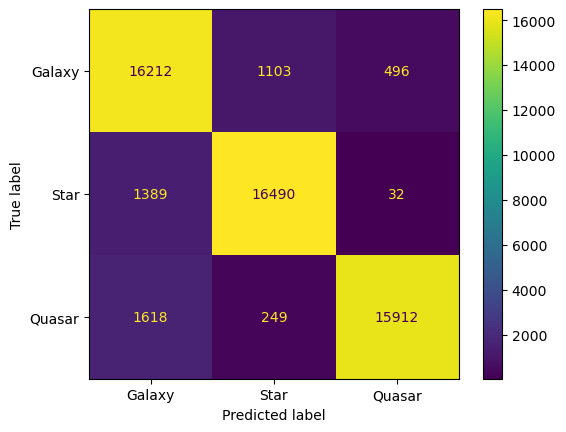

In [51]:
MP_knn_matrix = confusion_matrix(MP_test_label, MP_knn_pred)
MP_matrix_display = ConfusionMatrixDisplay(confusion_matrix=MP_knn_matrix, display_labels=labels)
MP_matrix_display.plot()

The accuracy of KNN for the more processed data is 90% and it performs the worst classifying QUASAR.

## Neural Network

### Neural networks for the less processed data, with a neuron structure of 10, 50, 3, using relu activation and adam solver.

#### Less Processed data

In [93]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 50, 3), random_state=1, activation='relu')
clf.fit(LP_train_values, LP_train_label)
prediction_test = clf.predict(LP_test_values)
print('Accuracy test data set: ',metrics.accuracy_score(prediction_test,LP_test_label))
    

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy test data set:  0.3347787891815106


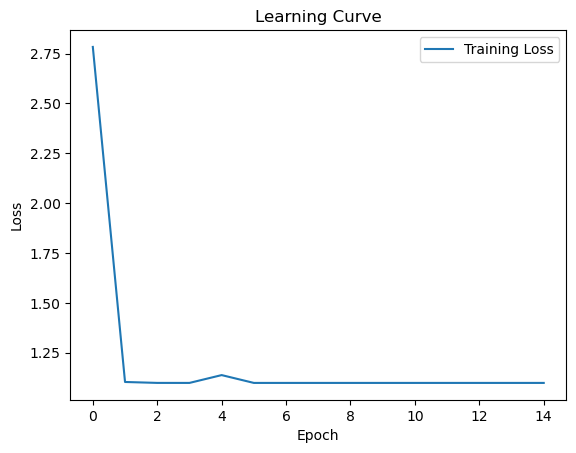

In [94]:
training_loss = clf.loss_curve_

plt.figure()
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

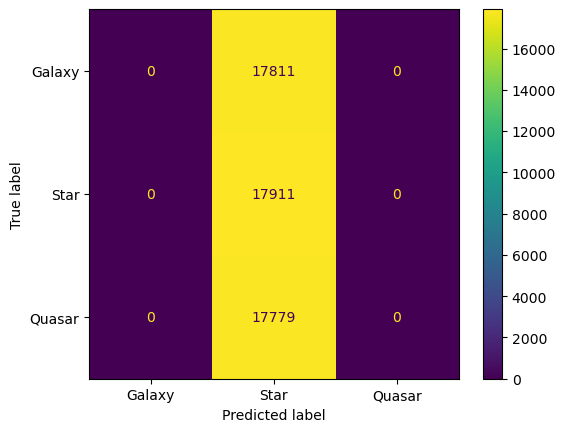

In [57]:
cm = confusion_matrix(LP_test_label, prediction_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

The neural network did not learn from the less processed data, as the accuracy was only 33%, and all the data was classified as QUASAR.

#### More Processed data

In [58]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 50, 3), random_state=1, activation='relu')
clf.fit(MP_train_values, MP_train_label)
prediction_test = clf.predict(MP_test_values)
print('Accuracy test data set: ',metrics.accuracy_score(prediction_test,MP_test_label))
    

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy test data set:  0.9693089848787874


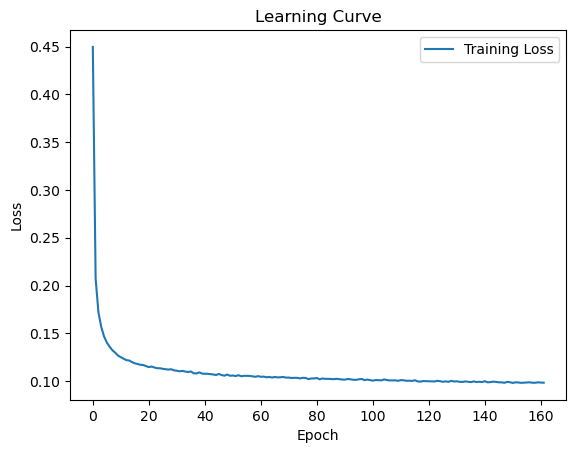

In [59]:
training_loss = clf.loss_curve_

plt.figure()
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

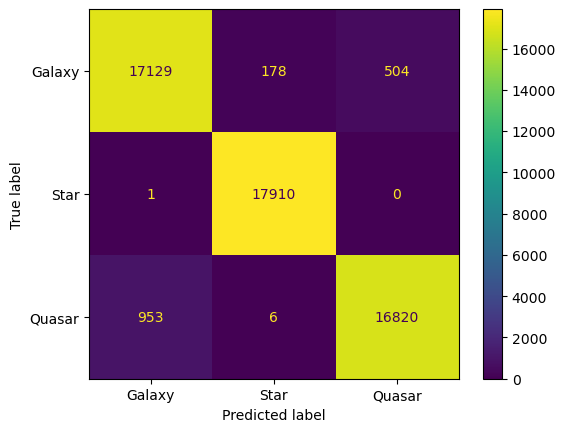

In [60]:
cm = confusion_matrix(LP_test_label, prediction_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

The accuracy of Neural Network for the more processed data is 96%.

### Neural networks for the less processed data, with a neuron structure of 13, 13, using relu activation and adam solver.

#### Less processed data

In [65]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(13,13), random_state=1, activation='relu')
clf.fit(LP_train_values, LP_train_label)
prediction_test = clf.predict(LP_test_values)
print('Accuracy test data set: ',metrics.accuracy_score(prediction_test,LP_test_label))
    

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy test data set:  0.33231154557858733


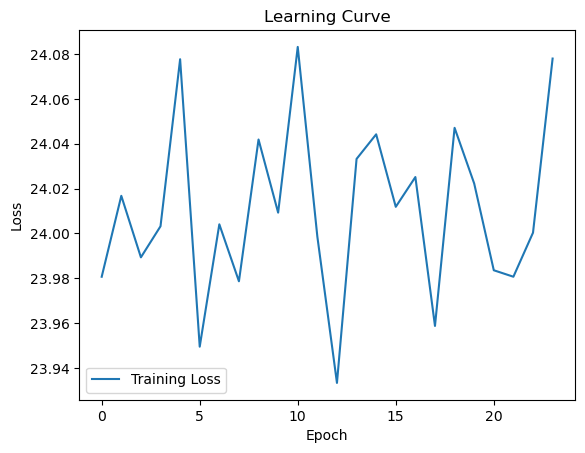

In [66]:
training_loss = clf.loss_curve_

plt.figure()
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

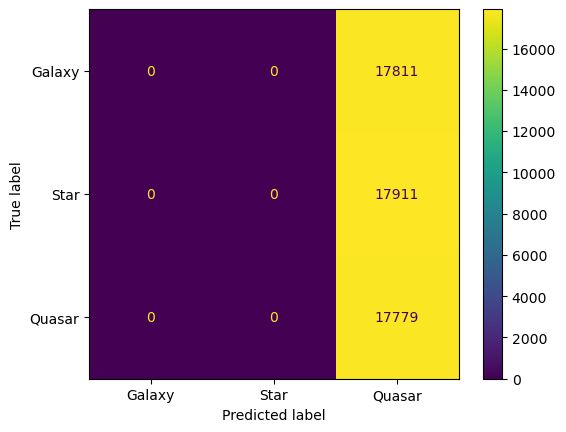

In [67]:
cm = confusion_matrix(LP_test_label, prediction_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

The neural network did not learn from the less processed data, as the accuracy was only 33%, and all the data was classified as GALAXY.

#### More processede data

In [68]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(13,13), random_state=1, activation='relu')
clf.fit(MP_train_values, MP_train_label)
prediction_test = clf.predict(MP_test_values)
print('Accuracy test data set: ',metrics.accuracy_score(prediction_test,MP_test_label))
    

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy test data set:  0.9683931141473991


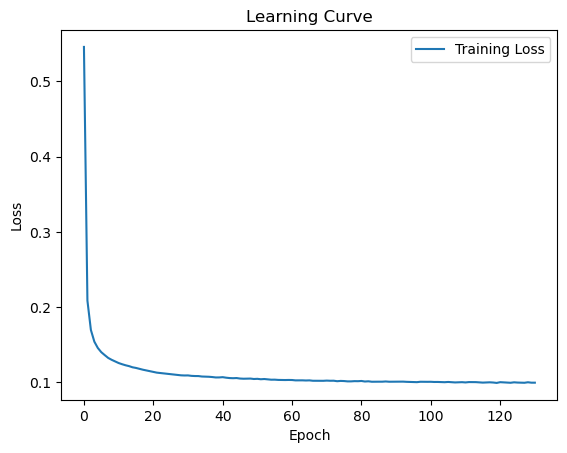

In [69]:
training_loss = clf.loss_curve_

plt.figure()
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

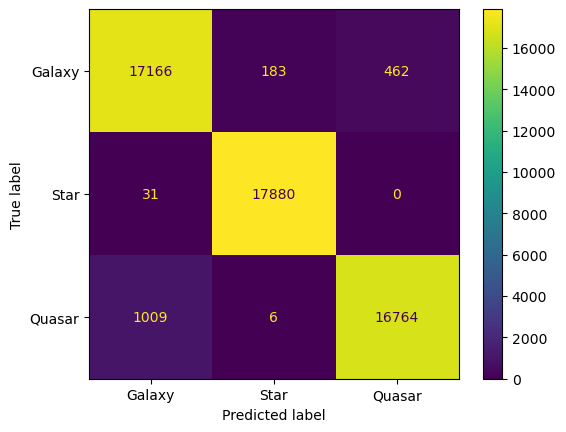

In [70]:
cm = confusion_matrix(LP_test_label, prediction_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

The accuracy of Neural Network for the more processed data is 96%.

### Neural networks for the less processed data, with a neuron structure of 6,3, using relu activation and adam solver.

#### Less processed data

In [71]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(6, 3), random_state=1, activation='relu')
clf.fit(LP_train_values, LP_train_label)
prediction_test = clf.predict(LP_test_values)
print('Accuracy test data set: ',metrics.accuracy_score(prediction_test,LP_test_label))
    

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy test data set:  0.3347787891815106


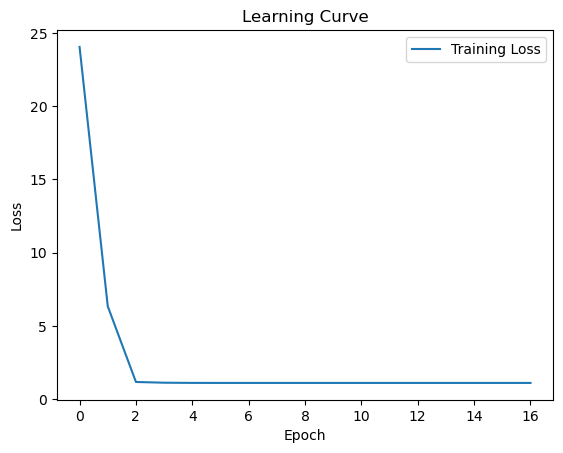

In [72]:
training_loss = clf.loss_curve_

plt.figure()
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

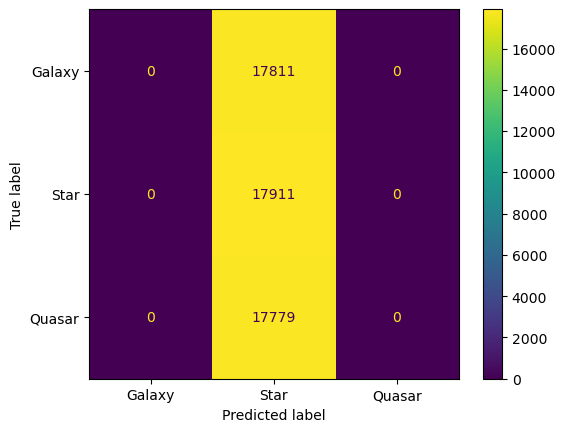

In [73]:
cm = confusion_matrix(LP_test_label, prediction_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

The neural network did not learn from the less processed data, as the accuracy was only 33%, and all the data was classified as STAR.

#### More processed data

In [74]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(6, 3), random_state=1, activation='relu')
clf.fit(MP_train_values, MP_train_label)
prediction_test = clf.predict(MP_test_values)
print('Accuracy test data set: ',metrics.accuracy_score(prediction_test,MP_test_label))
    

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy test data set:  0.9642997327152764


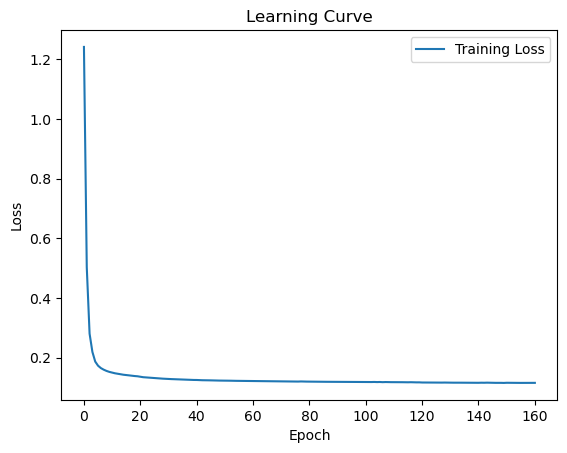

In [75]:
training_loss = clf.loss_curve_

plt.figure()
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

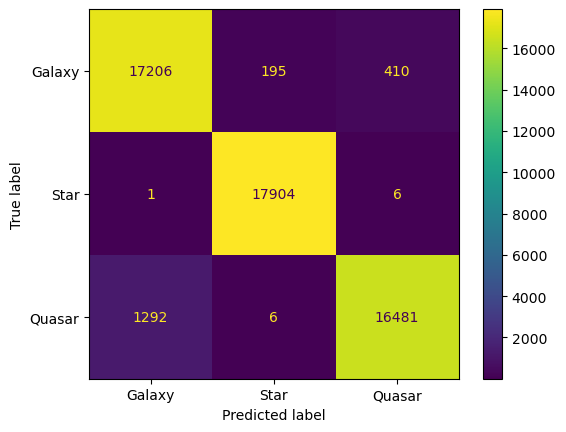

In [76]:
cm = confusion_matrix(LP_test_label, prediction_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

The accuracy of Neural Network for the more processed data is 96%.

### Neural networks for the less processed data, with a neuron structure of 6, 6, 3, using logistic activation and adam solver.

#### Less processed data

In [77]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(6, 6, 3), random_state=1, activation='logistic')
clf.fit(LP_train_values, LP_train_label)
prediction_test = clf.predict(LP_test_values)
print('Accuracy test data set: ',metrics.accuracy_score(prediction_test,LP_test_label))
    

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy test data set:  0.33290966523990206


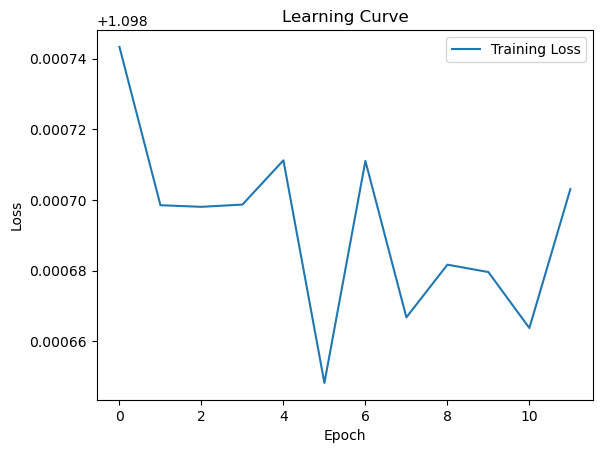

In [78]:
training_loss = clf.loss_curve_

plt.figure()
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

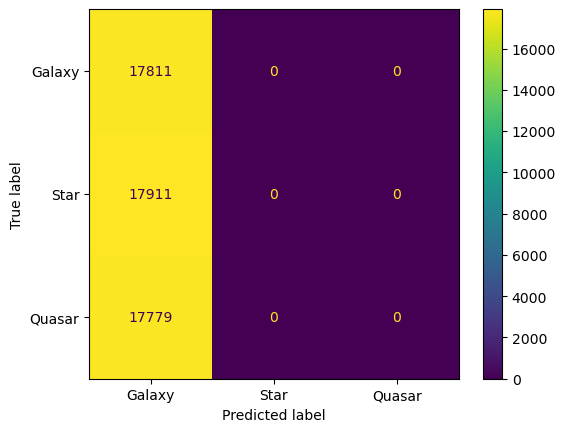

In [79]:
cm = confusion_matrix(LP_test_label, prediction_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

The neural network did not learn from the less processed data, as the accuracy was only 33%, and all the data was classified as GALAXY.

#### More Processed Data

In [103]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(6, 6, 3), random_state=1, activation='logistic')
clf.fit(MP_train_values, MP_train_label)
prediction_test = clf.predict(MP_test_values)
print('Accuracy test data set: ',metrics.accuracy_score(prediction_test,MP_test_label))
    

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy test data set:  0.9635333918992168


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


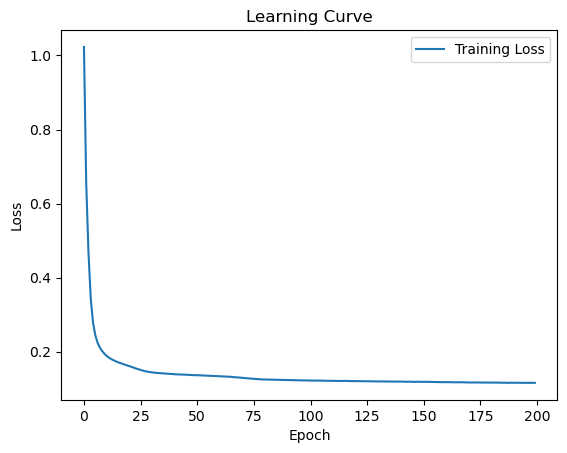

In [105]:
training_loss = clf.loss_curve_

plt.figure()
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

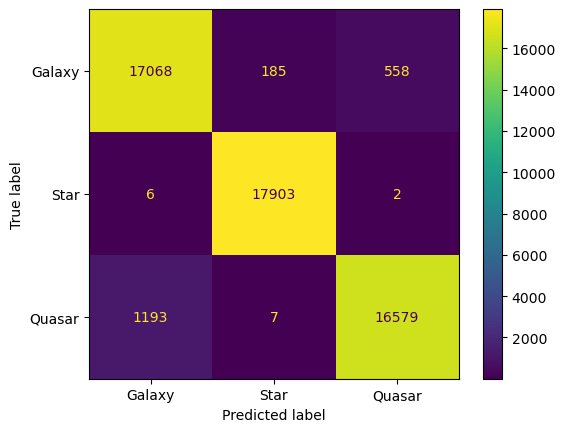

In [82]:
cm = confusion_matrix(LP_test_label, prediction_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

The accuracy of Neural Network for the more processed data is 96%.

### Neural networks for the less processed data, with a neuron structure of 6, 10, 3, using logistic activation and lbfgs solver.

#### Less processed data

In [85]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 10, 3), random_state=1,  activation='logistic')
clf.fit(LP_train_values, LP_train_label)
prediction_test = clf.predict(LP_test_values)
print('Accuracy test data set: ',metrics.accuracy_score(prediction_test,LP_test_label))
    

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy test data set:  0.33231154557858733


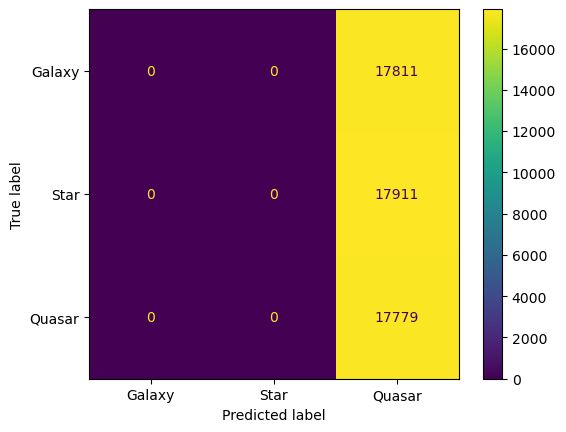

In [87]:
cm = confusion_matrix(LP_test_label, prediction_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

The neural network did not learn from the less processed data, as the accuracy was only 33%, and all the data was classified as QUASAR.

#### More processed data

In [95]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 10, 3), random_state=1, max_iter=3000, activation='logistic')
clf.fit(MP_train_values, MP_train_label)
prediction_test = clf.predict(MP_test_values)
print('Accuracy test data set: ',metrics.accuracy_score(prediction_test,MP_test_label))
    

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy test data set:  0.9621128577035943


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


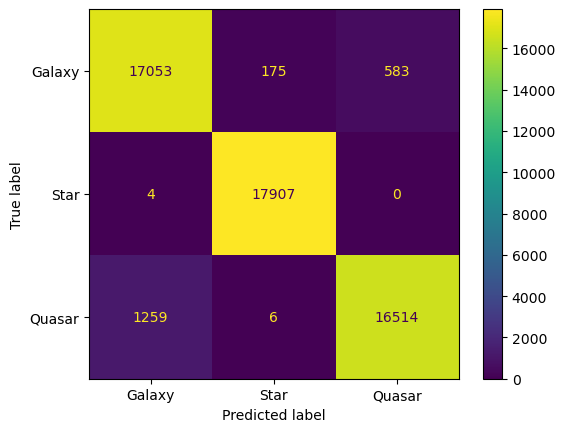

In [97]:
cm = confusion_matrix(LP_test_label, prediction_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

The accuracy of Neural Network for the more processed data is 95%.

## Accuracy

Let's create a plot with the best scores from every model for less processed data.

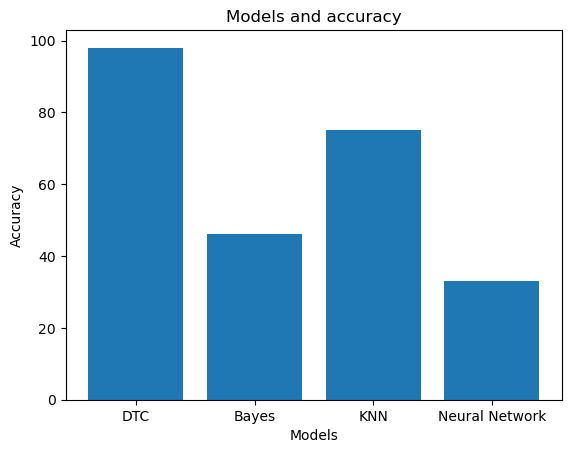

In [101]:
categories = ['DTC', 'Bayes', 'KNN', 'Neural Network']
values = [98, 46, 75, 33]

# Tworzenie wykresu słupkowego
plt.bar(categories, values)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models and accuracy')
plt.show()

Now for more processed data.

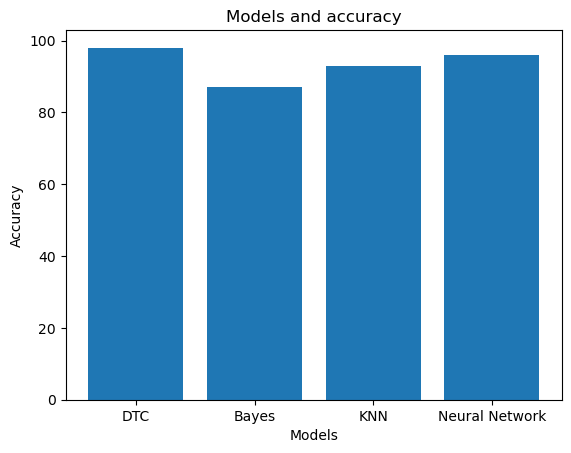

In [102]:
categories = ['DTC', 'Bayes', 'KNN', 'Neural Network']
values = [98, 87, 93, 96]

# Tworzenie wykresu słupkowego
plt.bar(categories, values)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models and accuracy')
plt.show()

## Summary
Summarizing the analysis of the "Stellar Classification Dataset," it can be observed that performing a higher number of preprocessing steps resulted in better or at least equal accuracy results for the classifiers. This preprocessing allowed us to demonstrate the importance of appropriately preparing the data for a specific problem.

Decision trees achieved high accuracy results, with similar values for both less and more processed data.

The Naive Bayes algorithm proved to be the worst-performing method, as the accuracy results for both types of data were significantly weaker compared to other models, indicating that it is not the best method for our problem.

The k-nearest neighbors algorithm yielded good accuracy results for more processed data and average results for less processed data. Additionally, it can be noticed that the larger the number of neighbors we use, the more the results differ between less and more processed data, and the worse they become.

Artificial neural networks turned out to be the best solution, as different network topologies consistently improved the results for more processed data, surpassing 90% accuracy. However, for less processed data, the model did not learn, resulting in an accuracy of 33%.